In [3]:
# We're going to start off in a jupyter notebook and slowly move this into a widget... for visualization with tests and stuff
#%matplotlib notebook
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv

In [2]:
data = sio.loadmat('/N/project/berkeley_walking/BerkeleyData/berkeley_pupilShadowMesh/s3_12_pupilShadowMesh.mat')
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'allPoints', 'cens', 'closestActualIndexDist', 'closestPrefIndexDist', 'eyeVec', 'fixBool', 'fixationList', 'frame_prefStepNum_XYZ', 'gazeXYZ', 'markerNames', 'shadow', 'step_plantfoot_xyz', 'y_flip', 'z_flip'])

In [3]:
environment_mesh = data['allPoints'] 
print(environment_mesh.shape) # num. of points x XYZ coordinates
skeleton = data['shadow'] # num of frames x num of pose landmarks x XYZ coordinates

markers = data['markerNames'];
hips = np.squeeze(skeleton[:,1,:])
print(skeleton.shape)
print(hips.shape)

footholds = data['step_plantfoot_xyz']
print(footholds.shape) # num of steps x [step #, foot that's down , XYZ coordinates]
gazeGround = data['gazeXYZ']
print(gazeGround.shape) # num of frames x XYZ coordinates;  it's where the gaze intersects the ground


(934290, 3)
(834, 30, 3)
(834, 3)
(46, 5)
(834, 3)


In [4]:
print(hips)

[[-13.62488928   0.68936894  -1.89805994]
 [-13.56314154   0.67954741  -1.86707804]
 [-13.46973684   0.66573783  -1.81733779]
 ...
 [ 17.90833563  -0.68302991  -1.72923914]
 [ 17.94724815  -0.69165372  -1.7520262 ]
 [ 17.99824434  -0.69523901  -1.77227255]]


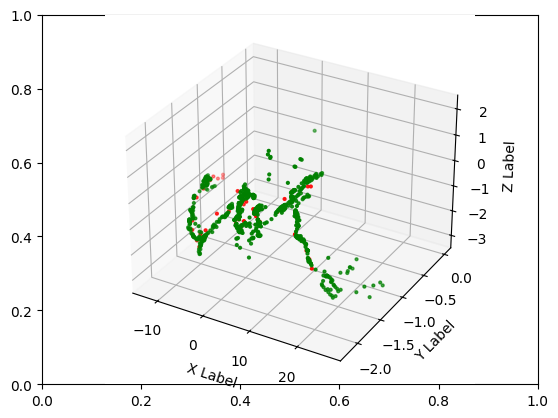

In [5]:
# Create a 3D figure
fig = plt.figure()
plt.cla()
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud data
# ax.scatter(environment_mesh[::200,0],environment_mesh[::200,1], environment_mesh[::200,2], s=1,alpha=.25)
ax.scatter(footholds[:,2],footholds[:,3],footholds[:,4],s=4,c='r')
ax.scatter(gazeGround[:,0],gazeGround[:,1],gazeGround[:,2],s=4,c='g')

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

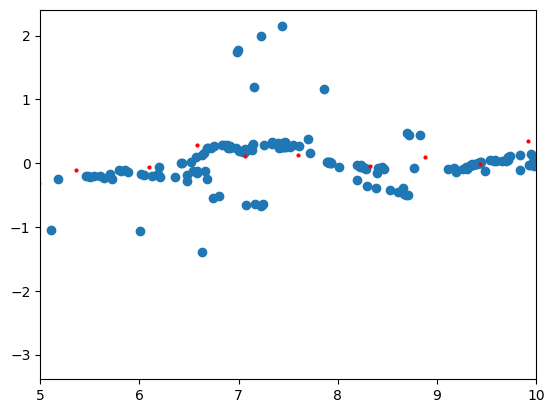

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot gaze points in the same figure as footholds
ax.scatter(gazeGround[:,0],gazeGround[:,2])
ax.scatter(footholds[:,2],footholds[:,4],s=4,c='r')
plt.xlim(5,10)
# Show the plot
plt.show()

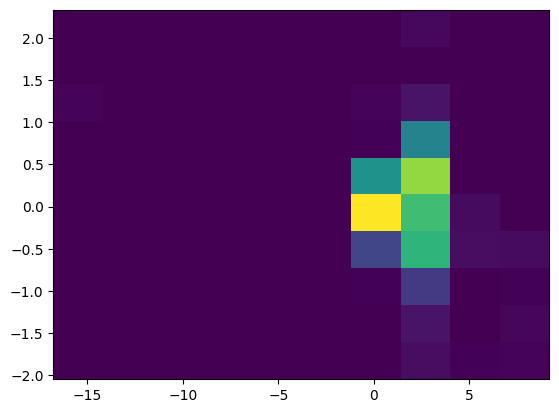

In [7]:
# scatter of gaze relative to current body position

fig = plt.figure()
ax = fig.add_subplot(111)

rel_gaze = gazeGround[:,0:3] - hips
# ax.scatter(rel_gaze[:,0],rel_gaze[:,2])
ax.hist2d(rel_gaze[:,0],rel_gaze[:,2])
plt.show()

In [8]:
# Eventual goal: a histogram of the gaze points around the upcoming footholds
# Goal right now: For every gaze point, how far is the nearest foothold?, what (#) is the near foothold?, 
#                 and what foothold (#) are you currently standing on?

from scipy.spatial.distance import cdist
distances = cdist(gazeGround,footholds[:,2:5])


(834, 46) (834, 3) (46, 3)


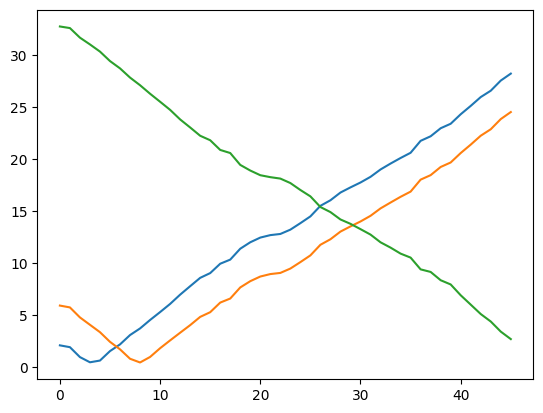

In [9]:
print(distances.shape,gazeGround.shape,footholds[:,2:5].shape)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(distances[0,:])
ax.plot(distances[100,:])
ax.plot(distances[800,:])
plt.show()


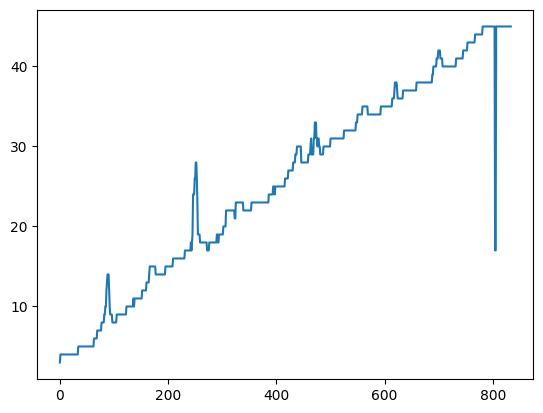

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
closest_foothold = np.argmin(distances,axis=1)
ax.plot(closest_foothold
       )
plt.show()

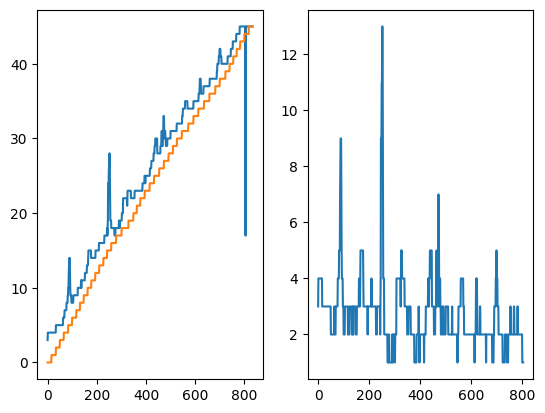

In [11]:
# find the current foothold
foothold_frame_start = footholds[:,0]-1
foothold_frame_end = np.concatenate((footholds[1:,0],np.array([gazeGround.shape[0]+1])))
foothold_nFrames = foothold_frame_end-foothold_frame_start
current_foothold = [ff*np.ones((int(nf-1),)) for ff,nf in enumerate(foothold_nFrames)]
current_foothold = np.concatenate(current_foothold)
rel_foothold_fixation = closest_foothold-current_foothold


fig = plt.figure()
ax = fig.add_subplot(121)
closest_foothold = np.argmin(distances,axis=1)
ax.plot(closest_foothold)
ax.plot(current_foothold)

ax = fig.add_subplot(122)
ax.plot(rel_foothold_fixation[:-30])
plt.show()

In [12]:
#foothold_frame_end
current_foothold

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 11., 11., 11

In [13]:
rel_foothold_fixation = [x for x in rel_foothold_fixation if x > 0 and np.abs(x) <= 5]
rel_foothold_fixation = np.array(rel_foothold_fixation)
rel_foothold_fixation.T

array([3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 5., 5., 5.,
       5., 5., 4., 4., 4., 4., 3., 3., 3., 2., 2., 2., 2., 2., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 4., 4., 4., 3., 3., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       2., 2., 2., 2., 3.

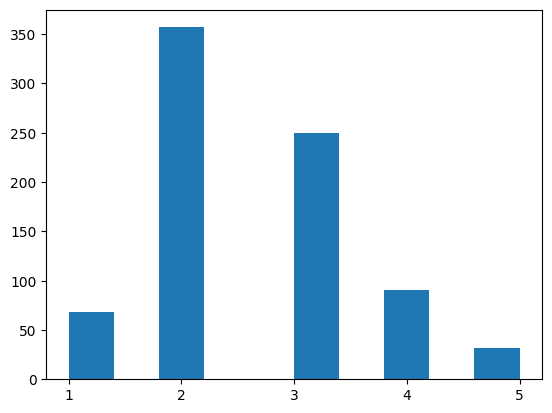

In [14]:
plt.hist(rel_foothold_fixation)
plt.xticks(np.arange(1,6,1))
plt.show()

In [15]:
s3= sio.loadmat('/N/project/berkeley_walking/BerkeleyData/2018-04-05-S03/OutputFiles/walkType.mat')
s3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'walks'])

In [16]:
s3['walks'][0][17]

array(['medium'], dtype='<U6')

In [5]:
#functions

def gathering_data(x): 
    skeleton_x = x['shadow']
    return x['shadow'], np.squeeze(skeleton_x[:,1,:]), x['step_plantfoot_xyz'], x['gazeXYZ']

def find_rel_gaze(x, y):
    return x[:,0:3] - y

def find_distance(x,y):
    return cdist(x,y[:,2:5])

def find_closest(x):
    return np.argmin(x,axis=1)

def find_current(x,y):
    foothold_frame_start = x[:,0]-1
    foothold_frame_end = np.concatenate((x[1:,0],np.array([y.shape[0]+1])))
    foothold_nFrames = foothold_frame_end-foothold_frame_start
    current_foothold = [ff*np.ones((int(nf-1),)) for ff,nf in enumerate(foothold_nFrames)]
    return np.concatenate(current_foothold)

def five_steps(a):
    rel_foothold_fixation = [x for x in a if x > 0 and np.abs(x) <= 5]
    rel_foothold_fixation = np.array(rel_foothold_fixation)
    return rel_foothold_fixation.T



(795,) (795,)


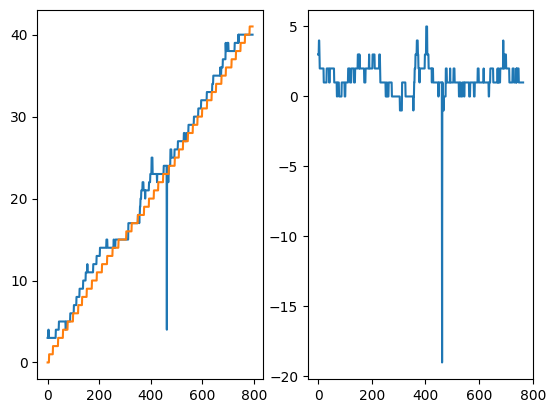

In [6]:

def function(x):
    data = sio.loadmat(x)
    skeleton = data['shadow']
    hips = np.squeeze(skeleton[:,1,:])
    footholds= data['step_plantfoot_xyz']
    gazeGround = data['gazeXYZ']

    foothold_frame_start = np.concatenate((np.array([0]),footholds[:,0]-1))
    foothold_frame_end = np.concatenate((footholds[:,0],np.array([gazeGround.shape[0]+1])))
    foothold_nFrames = foothold_frame_end-foothold_frame_start
    current_foothold = [ff*np.ones((int(nf-1),)) for ff,nf in enumerate(foothold_nFrames)]
    current_foothold = np.concatenate(current_foothold)


    rel_gaze = gazeGround[:,0:3] - hips
    distances = cdist(gazeGround,footholds[:,2:5])
    closest_foothold = np.argmin(distances,axis=1)

    print(closest_foothold.shape,current_foothold.shape)

    rel_foothold_fixation = closest_foothold - current_foothold
    return closest_foothold, current_foothold, rel_foothold_fixation
 

closest_foothold, current_foothold, rel_foothold_fixation = function('/N/project/berkeley_walking/BerkeleyData/berkeley_pupilShadowMesh/s3_18_pupilShadowMesh.mat')

fig = plt.figure()
ax = fig.add_subplot(121)
ax.plot(closest_foothold)
ax.plot(current_foothold)

ax = fig.add_subplot(122)
ax.plot(rel_foothold_fixation[:-30])
plt.show()


In [58]:
current_foothold.shape

(834,)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121)
closest_foothold = np.argmin(distances,axis=1)
ax.plot(closest_foothold)
ax.plot(current_foothold)

ax = fig.add_subplot(122)
ax.plot(rel_foothold_fixation[:-30])
plt.show()

In [19]:
#medium

s3_5 = sio.loadmat('/N/project/berkeley_walking/BerkeleyData/berkeley_pupilShadowMesh/s3_5_pupilShadowMesh.mat')
s3_18 = sio.loadmat('/N/project/berkeley_walking/BerkeleyData/berkeley_pupilShadowMesh/s3_18_pupilShadowMesh.mat')

skeleton_5, hips_5, footholds_5, gazeGround_5 = gathering_data(s3_5)


In [20]:
print(gazeGround_5.shape)
print(footholds_5.shape)
print(hips_5.shape)


(833, 3)
(50, 5)
(833, 3)


In [21]:
rel_gaze = find_rel_gaze(gazeGround_5, hips_5)
distances_5 = find_distance(gazeGround_5, footholds_5 )

In [22]:
closest_foothold_5 = find_closest(distances_5)
print(closest_foothold_5.shape)

current_foothold_5 = find_current(footholds_5, gazeGround_5)
print(current_foothold_5.shape) 

(833,)
(826,)


In [23]:
rel_foothold_fixation_5 = closest_foothold_5[:826] - current_foothold_5

rel_foothold_fixation_5 = five_steps(rel_foothold_fixation_5)


In [24]:
skeleton_18, hips_18, footholds_18, gazeGround_18 = gathering_data(s3_18)
print(gazeGround_18.shape)
print(footholds_18.shape)
print(hips_18.shape)


(795, 3)
(41, 5)
(795, 3)


In [25]:
rel_gaze = find_rel_gaze(gazeGround_18, hips_18)
distances_18 = find_distance(gazeGround_18, footholds_18 )

In [26]:
closest_foothold_18 = find_closest(distances_18)
print(closest_foothold_18.shape)

current_foothold_18 = find_current(footholds_18, gazeGround_18)
print(current_foothold_18.shape) 

rel_foothold_fixation_18 = closest_foothold_18[:789] - current_foothold_18

rel_foothold_fixation_18 = five_steps(rel_foothold_fixation_18)

(795,)
(789,)


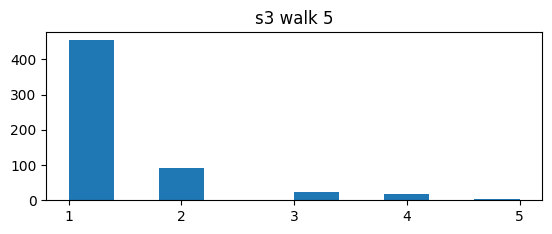

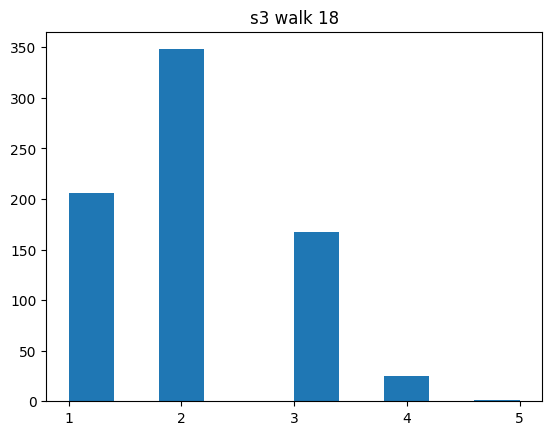

In [27]:
#plotting walk 5 and 18

fig = plt.figure()
ax = fig.add_subplot(211)
plt.hist(rel_foothold_fixation_5)
plt.title('s3 walk 5')
plt.xticks(np.arange(1,6,1))
plt.show()

ax = fig.add_subplot(212)
plt.hist(rel_foothold_fixation_18)
plt.title('s3 walk 18')
plt.xticks(np.arange(1,6,1))
plt.show()

In [28]:
s3_medium_rel_foothold_fixation = [y for x in [rel_foothold_fixation_18
                             , rel_foothold_fixation_5] for y in x]

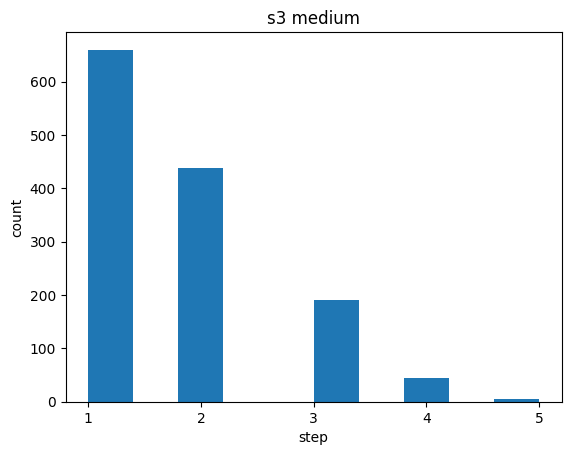

In [29]:
s3_medium_rel_foothold_fixation = np.array(s3_medium_rel_foothold_fixation)
s3_medium_rel_foothold_fixation.T
s3_medium_rel_foothold_fixation.shape

plt.hist(s3_medium_rel_foothold_fixation)
plt.title('s3 medium')
plt.ylabel('count')
plt.xlabel('step')
plt.xticks(np.arange(1,6,1))
plt.show()

(571, 3)
(566,)


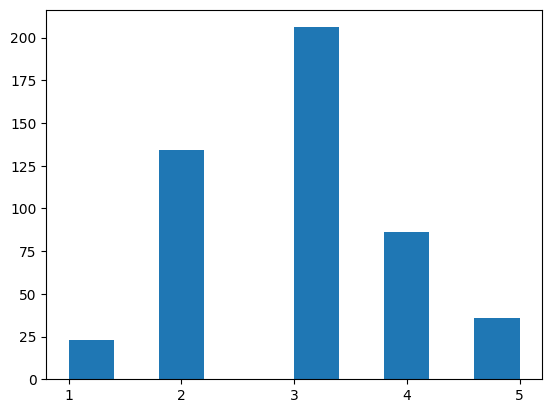

In [30]:
#rock walks

s3_8 = sio.loadmat('/N/project/berkeley_walking/BerkeleyData/berkeley_pupilShadowMesh/s3_8_pupilShadowMesh.mat')

skeleton_8, hips_8, footholds_8, gazeGround_8 = gathering_data(s3_8)

print(gazeGround_8.shape)

rel_gaze = find_rel_gaze(gazeGround_8, hips_8)

distances_8 = find_distance(gazeGround_8, footholds_8 )

closest_foothold_8 = find_closest(distances_8)

current_foothold_8 = find_current(footholds_8, gazeGround_8)
print(current_foothold_8.shape) 

rel_foothold_fixation_8 = closest_foothold_8[:566] - current_foothold_8

rel_foothold_fixation_8 = five_steps(rel_foothold_fixation_8)

rel_foothold_fixation_8

plt.hist(rel_foothold_fixation_8)
plt.xticks(np.arange(1,6,1))
plt.show()